In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('health.csv')
df1.rename(columns={'Suffered.Heart.storke':'stroke'}, inplace=True)

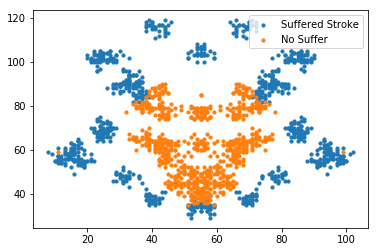

In [3]:
# Plotting scatter plot to survey the distribution of our data set points in the two categories of 
# people suffering from stroke and those not suffering.
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
stroke = df1.loc[df1.stroke == 1]
n_stroke = df1.loc[df1.stroke == 0]
plt.scatter(stroke.iloc[:, 0], stroke.iloc[:, 1], s=10, label='Suffered Stroke')
plt.scatter(n_stroke.iloc[:, 0], n_stroke.iloc[:, 1], s=10, label='No Suffer')
plt.legend()
plt.show()

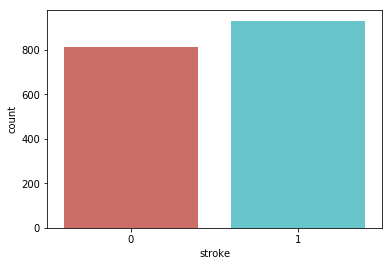

In [4]:
df1['stroke'].value_counts()
sns.countplot(x='stroke',data=df1,palette='hls')
plt.show() #Representing the Target column for binary classification

In [5]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 96, 108],
       [ 90, 142]])

Text(0.5,257.44,'Predicted label')

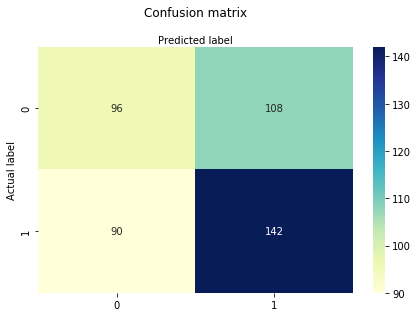

In [9]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()  
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
formula = 'stroke ~ weight+BP'

In [14]:
model = smf.glm(formula = formula, data=df1, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
# The glm() function fits generalized linear models, a class of models that includes logistic regression.
# We must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 1742
Model:                            GLM   Df Residuals:                     1739
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.0
Date:                Wed, 17 Apr 2019   Deviance:                       2276.0
Time:                        18:35:26   Pearson chi2:                 1.72e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6799      0.215     -7.823      0.000      -2.101      -1.259
weight      2.385e-18      0.002   1.02e-15      1.0

In [15]:
print("Coefficeients")
print(result.params) #We use the .params attribute in order to access just the coefficients for this fitted model.
print()
print("p-Values")
print(result.pvalues) #We can use .pvalues to get the p-values for the coefficients,
print()
print("Dependent variables")
print(result.model.endog_names) #The .model.endog_names to get the endogenous (or dependent) variables.

Coefficeients
Intercept   -1.679925e+00
weight       2.385245e-18
BP           2.678511e-02
dtype: float64
()
p-Values
Intercept    5.173143e-15
weight       1.000000e+00
BP           8.490656e-28
dtype: float64
()
Dependent variables
stroke


In [32]:
 print('The Null Deviance is :',result.null_deviance) # Computing the Null Deviance from the Model.

('The Null Deviance is :', 2406.9255417684235)


In [63]:
print('The AIC value is :',result.aic)

('The AIC value is :', 2281.9548661891863)


In [35]:
#Residual Deviance is yet to be calculated.

In [39]:
df2 = df1.copy(deep=True)
df2 = df2.drop(['weight'],axis=1)

In [48]:
X_2 = df2.iloc[:, :-1]
y_2 = df2.iloc[:, -1]

In [50]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X_2,y_2,test_size=0.25,random_state=0)

In [52]:
logreg_2 = LogisticRegression()
logreg_2.fit(X2_train,y2_train)
y_pred_2=logreg_2.predict(X2_test)

In [76]:
cnf_matrix_2 = confusion_matrix(y2_test, y_pred_2)
cnf_matrix_2

array([[100, 104],
       [ 91, 141]])

In [57]:
formula_2 = 'stroke ~ BP'

In [60]:
model_2 = smf.glm(formula = formula_2, data=df2, family=sm.families.Binomial())
result_2 = model_2.fit()
print(result_2.summary())
# The glm() function fits generalized linear models, a class of models that includes logistic regression.
# We must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 stroke   No. Observations:                 1742
Model:                            GLM   Df Residuals:                     1740
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.0
Date:                Wed, 17 Apr 2019   Deviance:                       2276.0
Time:                        19:46:27   Pearson chi2:                 1.72e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6799      0.172     -9.783      0.000      -2.016      -1.343
BP             0.0268      0.002     10.928      0.0

In [62]:
print("Coefficeients")
print(result_2.params) #We use the .params attribute in order to access just the coefficients for this fitted model.
print()
print("p-Values")
print(result_2.pvalues) #We can use .pvalues to get the p-values for the coefficients,
print()
print("Dependent variables")
print(result_2.model.endog_names) #The .model.endog_names to get the endogenous (or dependent) variables.

Coefficeients
Intercept   -1.679925
BP           0.026785
dtype: float64
()
p-Values
Intercept    1.327215e-22
BP           8.490656e-28
dtype: float64
()
Dependent variables
stroke


In [64]:
 print('The Null Deviance is :',result_2.null_deviance) # Computing the Null Deviance from the Model.

('The Null Deviance is :', 2406.9255417684235)


In [66]:
print('The AIC value is :',result_2.aic)

('The AIC value is :', 2279.9548661891863)


In [175]:
df3 = df1.copy(deep=True)

In [176]:
df3['BP^2'] = df3.BP * df3.BP 
#df3['BP^3'] = df3.BP * df3.BP * df3.BP
df3['weight^2'] = df3.weight*df3.weight
#df3['weight^3'] = df3.weight*df3.weight*df3.weight
#df3['BPweight'] = df3.BP*df3.weight

In [177]:
df3['stroke1']=df3.stroke
df3 = df3.drop(['stroke'],axis=1)
#print(df3)

In [178]:
print(df3.head(2))

   weight  BP  BP^2  weight^2  stroke1
0      55  41  1681      3025        0
1      55  85  7225      3025        0


In [179]:
X_3 = df3.iloc[:, :-1]
y_3 = df3.iloc[:, -1]
#print(y_3)

In [180]:
X3_train,X3_test,y3_train,y3_test=train_test_split(X_3,y_3,test_size=0.25,random_state=0)

In [181]:
logreg_3 = LogisticRegression()
logreg_3.fit(X3_train,y3_train)
y_pred_3=logreg_3.predict(X3_test)

In [182]:
cnf_matrix_3 = confusion_matrix(y3_test, y_pred_3)
cnf_matrix_3

array([[173,  31],
       [ 51, 181]])

In [183]:
formula_3 = 'stroke1 ~ BP + weight + weight^2 + BP^2 '

In [184]:
model_3 = smf.glm(formula = formula_3, data=df3, family=sm.families.Binomial())
result_3 = model_3.fit()
print(result_3.summary())
# The glm() function fits generalized linear models, a class of models that includes logistic regression.
# We must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                stroke1   No. Observations:                 1742
Model:                            GLM   Df Residuals:                     1737
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1136.8
Date:                Thu, 18 Apr 2019   Deviance:                       2273.7
Time:                        11:59:10   Pearson chi2:                 1.72e+03
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6710      0.215     -7.775      0.000      -2.092      -1.250
BP             0.0099      0.025      0.394      0.6

In [185]:
print("Coefficeients")
print(result_3.params) #We use the .params attribute in order to access just the coefficients for this fitted model.
print()
print("p-Values")
print(result_3.pvalues) #We can use .pvalues to get the p-values for the coefficients,
print()
print("Dependent variables")
print(result_3.model.endog_names) #The .model.endog_names to get the endogenous (or dependent) variables.

Coefficeients
Intercept    -1.670986
BP            0.009887
weight       -0.033727
weight ^ 2    0.033674
BP ^ 2        0.016824
dtype: float64
()
p-Values
Intercept     7.568015e-15
BP            6.938049e-01
weight        1.793585e-01
weight ^ 2    1.774534e-01
BP ^ 2        5.003310e-01
dtype: float64
()
Dependent variables
stroke1


In [186]:
 print('The Null Deviance is :',result_3.null_deviance) # Computing the Null Deviance from the Model.

('The Null Deviance is :', 2406.9255417684235)


In [187]:
print('The AIC value is :',result_3.aic)
#The lowest AIC found was 2278.79818716 for BP^3 only in formula.
# Increasing the polynomality increases the AIC. We target for lower values of AIC.
# for formula_3 = 'stroke1 ~ BP + weight + weight^2 + BP^2 + BPweight' AIC comes out to be  2285.665509487214
# for formula_3 = 'stroke1 ~ BP + weight + weight^2 + BP^2' AIC comes out to be 2283.6655096634813

('The AIC value is :', 2283.6655096634813)
